<a href="https://colab.research.google.com/github/TAlchemist/python-bites/blob/main/Bites/Bite9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bite 9: Plot all crimes in a line chart

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Curbal-Data-Labs/python-bites/blob/main/Bites/Bite9.ipynb)

### Video tutorial and Bite 9 available [here](https://curbal.com/curbal-learning-portal/bite-9)

[![Bite 1](https://img.youtube.com/vi/ZgqnPYmEcXw/0.jpg)](https://www.youtube.com/watch?v=ZgqnPYmEcXw)

**1.** Connect to the database

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  #convert dates to matplotlib dates

def get_data():
    #read the db
    global df_tbl
    global conn
    conn = sqlite3.connect(r'C:\Users\Ruth Pozuelo\Documents\GitHub\local-python-game\Data\murder-mystery.db')
    #List all tables in dB and convert them to a list
    df_tbl = pd.read_sql_query('SELECT name from sqlite_master where type= "table"',conn)
    df_tbl = df_tbl.name.tolist()   #convert to list

get_data()    
df_tbl

['crime_scene_report',
 'drivers_license',
 'facebook_event_checkin',
 'interview',
 'get_fit_now_member',
 'get_fit_now_check_in',
 'income',
 'person',
 'crimes_geo']

**2.** Get the data from the Crime Scene Report table

In [ ]:
df = pd.read_sql_query("SELECT * from crime_scene_report", conn)
df

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
...,...,...,...,...
1223,20180430,bribery,\n,Garden Grove
1224,20180430,fraud,‘Why not?’ said the March Hare.\n,Houma
1225,20180430,assault,\n,Fontana
1226,20180501,assault,be NO mistake about it: it was neither more no...,Trenton


**3.** Convert the date column to dates and add a year month column

In [ ]:
df['date'] = pd.to_datetime(df['date'],  format='%Y%m%d') #convert int to datetime
df['year_month'] = df['date'].dt.strftime('%Y-%m')
df

,date,type,description,city,year_month
0,2018-01-15,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC,2018-01
1,2018-01-15,murder,Life? Dont talk to me about life.,Albany,2018-01
2,2018-01-15,murder,"Mama, I killed a man, put a gun against his he...",Reno,2018-01
3,2018-02-15,murder,REDACTED REDACTED REDACTED,SQL City,2018-02
4,2018-02-15,murder,Someone killed the guard! He took an arrow to ...,SQL City,2018-02
...,...,...,...,...,...
1223,2018-04-30,bribery,\n,Garden Grove,2018-04
1224,2018-04-30,fraud,‘Why not?’ said the March Hare.\n,Houma,2018-04
1225,2018-04-30,assault,\n,Fontana,2018-04
1226,2018-05-01,assault,be NO mistake about it: it was neither more no...,Trenton,2018-05


**4.** Aggregate the number of crimes by month

In [ ]:
df2 = df.groupby(by = ['year_month'])['type'].count().reset_index(name= 'crimes')
df2 = df2[:-1] #the last month is not complete so we drop it
df2['year_month'] = pd.to_datetime(df2['year_month'])
df2.head()

,year_month,crimes
0,2017-01-01,86
1,2017-02-01,72
2,2017-03-01,78
3,2017-04-01,79
4,2017-05-01,73


**5.** Plot all crimes on a line chart using matplotlib

Text(-200, -35, 'Least crimes \noccurred on 2017-08')

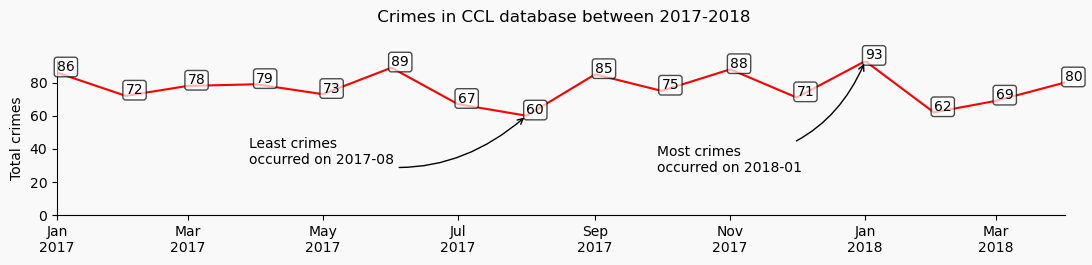

In [ ]:
# creates the Figure and adds a single Axes object
fig, ax = plt.subplots(figsize=(13,2),facecolor = "#F9F9F9")

ax.plot(df2.year_month, df2.crimes, color = 'r')



ax.set_facecolor("#F9F9F9")

for x,y in zip(df2.year_month, df2.crimes):
    ax.annotate(y, xy=(x,y), xytext= (x,y+1), fontsize = 10,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha = 0.7))

# hide some of the spines (must be done with Matplotlib)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
    
#add label
ax.set_ylabel("Total crimes")
ax.set_title(" Crimes in CCL database between 2017-2018", y = 1.2)
ax.set_xlim(df2.year_month.min(),df2.year_month.max()) 
ax.set_ylim(0, df2.crimes.max())

#format x tick labels  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))


h_date = df2[df2['crimes'] == df2.crimes.max()]['year_month'].dt.date.values[0] #date for highest crimes
h_exp =  df2.crimes.max() #highest crimes

l_date = df2[df2['crimes'] == df2.crimes.min()]['year_month'].dt.date.values[0] #date for lowest crimes
l_exp =  df2.crimes.min() #lowest crimes

#annotate highest export value and date
ax.annotate( "Most crimes \noccurred on " +h_date.strftime("%Y-%m")  ,  (h_date, h_exp), xytext=(-150, -80), textcoords='offset points', size= 10,
            arrowprops= dict( arrowstyle="->", connectionstyle="arc3, rad=0.3"))


ax.annotate( "Least crimes \noccurred on " + l_date.strftime("%Y-%m")  , (l_date, l_exp), xytext=(-200, -35), textcoords='offset points', size= 10,  
            arrowprops= dict( arrowstyle="->", connectionstyle="arc3, rad=0.3"))

# Bite 9: Put the game together as instructed on the website


A crime has taken place and Curbal Crime Labs (CCL) needs your help.
The crime is a murder that occurred sometime on Jan.15, 2018.
and a crime data analyst or curbalist as we call it at CCL,
is needed to help solve the case.

All the crime files will be provided to you
but before we do that:



Do you accept the challenge? (y/n)
 y

What is your name?
 ruth



Hi Ruth! Welcome to Curbal Crime Labs!. 


Right Ruth, Let's get you iniciated:
To be able to solve this murder, you will need to familiarize yourself with our crime database.

But before we focus on the crime that occurred in SQL City, 
let me show you all the crimes stored on our database between 2017 and 2018:


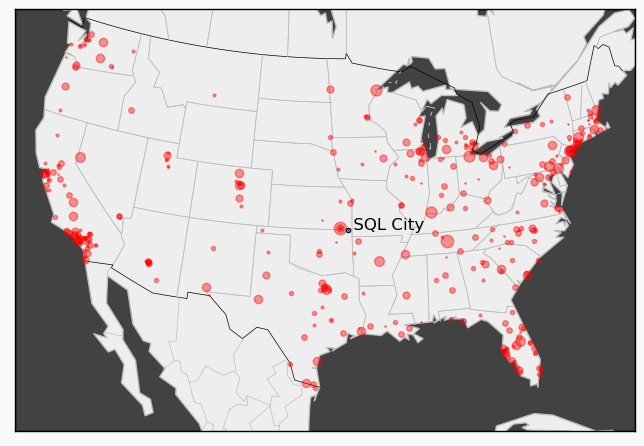


The number of crimes has been stable for the past two years: 



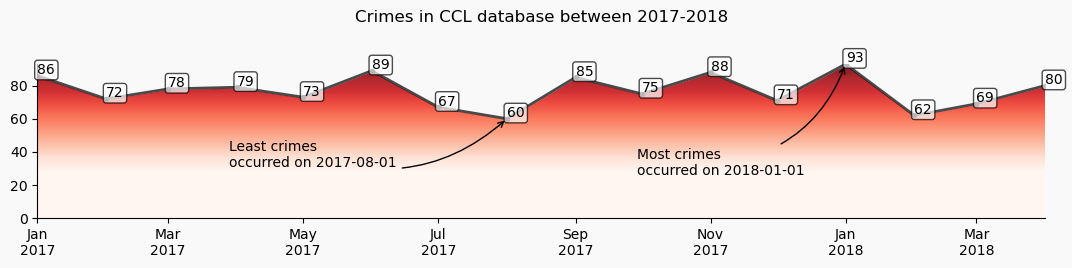

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.ticker as ticker
import matplotlib.dates as mdates  #convert dates to matplotlib dates
from datetime import datetime
import time

def intro():
    print("\nA crime has taken place and Curbal Crime Labs (CCL) needs your help.\n" 
      "The crime is a murder that occurred sometime on Jan.15, 2018.\n"
      "and a crime data analyst or curbalist as we call it at CCL,\n"
      "is needed to help solve the case.\n"
      "\nAll the crime files will be provided to you\n"
      "but before we do that:\n")

def username():
    global Participant
    while True:

        Accept_challenge = input("Do you accept the challenge? (y/n)\n")

        if Accept_challenge.lower().strip() != "y" and Accept_challenge.lower().strip() != "n":   
            print("Only yes or no answers are allowed, please try again.\n")
            continue
        else:
            break

    if Accept_challenge.lower().strip() == "y":
        Participant = input("\nWhat is your name?\n").title()
        print("\nHi "+Participant + "! Welcome to Curbal Crime Labs!. \n")
    elif Accept_challenge.lower().strip() == "n":
        print("\nBye, bye.")

def get_data():
    #read the db
    global df_proper
    global df_name
    global conn
    conn = sqlite3.connect(r'C:\Users\Ruth Pozuelo\Documents\GitHub\local-python-game\Data\murder-mystery.db')
    #List all tables in dB and convert them to a list
    df_tbl = pd.read_sql_query('SELECT name from sqlite_master where type= "table"',conn)

    df_tbl['proper_name'] = df_tbl.name #copy column
    df_tbl.proper_name= df_tbl.proper_name.str.replace('_', ' ').str.title() #proper casing and replace _
    #variable that contains the values with proper names
    df_proper = df_tbl.proper_name.tolist()   #convert to list
    df_name = df_tbl.name


def get_all_tables():    
    #Loop over all the tables, get the table info and append it to a big table
    global scheme_tabular_all
    result_list = []
    for tbl_name in df_name:
        result = pd.read_sql_query("PRAGMA table_info('%s')" %  tbl_name,conn) 
        result["table_name"] = tbl_name
        result_list.append(result)
        
    scheme_table = pd.concat(result_list)
    scheme_tabular_all = print(scheme_table)
    
def get_x_info(tbl_name):    
    #Loop over all the tables, get the table info and append it to a big table
    result = pd.read_sql_query("PRAGMA table_info('%s')" %  tbl_name,conn) 
    result["table_name"] = tbl_name
    scheme_tabular = print(result)
    
def crimes_map():
    df = pd.read_sql_query("SELECT * from crimes_geo", conn)
    df_c = pd.read_sql_query("SELECT * from crime_scene_report", conn)
    df_c  = df_c.groupby(["city"])["city"].count().reset_index(name="crimes").sort_values('crimes', ascending = False)
    df = df.merge(df_c[['crimes', 'city']], on=['city'])

    fig = plt.figure(figsize=(8, 8),facecolor = "#F9F9F9")
    m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    m.drawcoastlines(color='#bdbdbd')
    m.drawcountries()
    m.drawmapboundary(fill_color='#424242') #color the ocean
    m.fillcontinents(color='#eeeeee')
    m.drawstates(color='#bdbdbd')

    c = df['crimes'].unique()
    cmap="Spectral"

    for lat, long, cnt in zip(df.lat,df.long, df['crimes']):

        # Map (long, lat) to (x, y) for plotting
        x, y = m(long,lat)

        plt.plot(x, y , 'o', markersize=cnt, markeredgecolor="red", markeredgewidth=1, c='red', alpha = 0.4)

    #Plot the text
    x1, y1 = m(int(-95.712891),int(37.09024))
    plt.text(x1, y1, ' SQL City', fontsize=12)
    plt.plot(x1, y1 , 'o', markersize=cnt, markeredgecolor="black", markeredgewidth=3, c='blue')
    plt.show()
    plt.close()
    
def line_chart_gen():  
    df = pd.read_sql_query("SELECT * from crime_scene_report", conn)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    df['year_month'] = df['date'].dt.strftime('%Y-%m')
    df2 = df.groupby((['year_month']))["type"].count().reset_index(name="crimes").sort_values('year_month', ascending = True)  #get a count of unique values
    df2 = df2[:-1] #the last month is not complete so we drop it
    df2['year_month'] = pd.to_datetime(df2['year_month'])
    # creates the Figure and adds a single Axes object
    
    # creates the Figure and adds a single Axes object
    fig, ax = plt.subplots(figsize=(13,2),facecolor = "#F9F9F9")

    ax.plot(df2.year_month, df2['crimes'],'ko-', markersize = 3, linewidth=2, alpha = 0.7)

    for i,j in zip(df2.year_month, df2['crimes']):
        ax.annotate(f"{int(j):,}", xy=(i, j),xytext =(i,j+1), fontsize=10,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha = 0.7))

    #add labels       
    ax.set_ylabel = 'Total crimes'
    ax.set_title('Crimes in CCL database between 2017-2018', y=1.4, pad=-14)
    ax.set_xlim(df2.year_month.min(),df2.year_month.max()) # this can also be done with pandas

    # hide some of the spines (must be done with Matplotlib)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    #format x and y tick labels  
    #format x and y tick labels  

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))


    #create the background gradiant    
    ax.imshow(np.linspace(0, 1, 256).reshape(-1, 1), cmap='Reds', vmin=0.3, aspect='auto', alpha = 0.9,
                      extent=[mdates.date2num(df2.year_month).min(),
                              mdates.date2num(df2.year_month).max(),
                              0, df2.crimes.max()],
                            origin='lower')
    #color the top part same color as background to give the gradiant effect
    ax.fill_between(df2.year_month,  df2['crimes'],  df2['crimes'].max(), color = '#F9F9F9')

    h_date = df2[df2['crimes'] == df2.crimes.max()]['year_month'].dt.date.values[0]
    h_exp =  df2.crimes.max()
    l_date = df2[df2['crimes'] == df2.crimes.min()]['year_month'].dt.date.values[0]
    l_exp =  df2.crimes.min()

    #annotate highest export value and date
    ax.annotate( "Most crimes \noccurred on " +h_date.strftime("%Y-%m-%d")  ,  (h_date, h_exp), xytext=(-150, -80), textcoords='offset points', size= 10,  
                arrowprops= dict( arrowstyle="->", connectionstyle="arc3, rad=0.3"))


    ax.annotate( "Least crimes \noccurred on " + l_date.strftime("%Y-%m-%d")  , (l_date, l_exp), xytext=(-200, -35), textcoords='offset points', size= 10,  
                arrowprops= dict( arrowstyle="->", connectionstyle="arc3, rad=0.3"))
    plt.show()
    plt.close()



def help():
    #call the function to read the database
    get_data()
    #print a list of all the available tables
    list(map(print, df_proper))

    print("\nLet's explore those tables before moving forward.\n")

    while True:
        n = range(1,9)

        while True:
            print("Which table would you like see?")
            print("Type 0 for all tables.")
            for i, tbl in zip(n, df_proper):
                print("Type " + str(i) + " for the " + tbl.title().replace('_', ' ') + " table.")
            inspect_table = input()
            #catch the error that results if the user enters a letter
            try:  
                if int(inspect_table) not in range(0,9):
                    print("\nSorry, wrong answer. Only numbers from 1 to 8 allowed. Try again!\n")
                    continue
                else:
                    break
            except:
                print("\nSorry, wrong answer. Only numbers from 1 to 8 allowed. Try again!\n")
            continue


        #show the entire table
        if str(inspect_table) == "0":               
            print("\n Here you have all tables and columns.y")
            get_all_tables()
            while True:
                more_help =input( "\n There you go, need more help? (y/n)?\n").lower().strip()
                if more_help !='y' and more_help !='n':
                    print("\nSorry, wrong answer. Only 'y' or 'n' answers allowed. Try again!")
                    continue
                else:
                    break

        #looop the tables            
        for i,tbl in zip(n, df_name):
            if str(inspect_table) == str(i):               
                print("\n Here you have the " + tbl.title().replace('_', ' ') + " table:\n")
                get_x_info(tbl)
                while True:
                    more_help =input( "\n There you go, need more help? (y/n)?\n").lower().strip()
                    if more_help !='y' and more_help !='n':
                        print("\nSorry, wrong answer. Only 'y' or 'n' answers allowed. Try again!")
                        continue
                    else:
                        break

        if more_help =="y":
            continue
        elif more_help =="n":
            break

intro()
username()

time.sleep(1) 
print("\nRight "+ Participant +", Let's get you iniciated:")
print("To be able to solve this murder, you will need to familiarize yourself "
      "with our crime database.\n")        
time.sleep(1)
print("But before we focus on the crime that occurred in SQL City, "
      "\nlet me show you all the crimes stored on our database between 2017 and 2018:")
time.sleep(2)

get_data()
crimes_map()
time.sleep(2)

print("\nThe number of crimes has been stable for the past two years: \n")
time.sleep(2)
   
line_chart_gen()